In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
we=pd.read_csv("weatherHistory.csv");

In [ ]:
we.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
we.shape

(24508, 12)

In [ ]:
we.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,24508.000000,24508.000000,24508.000000,24508.000000,24508.000000,24507.000000,24507.0,24507.000000
mean,11.770534,10.660277,0.718518,10.796392,192.762078,10.163295,0.0,1000.917116
std,9.563249,10.654191,0.191128,6.881443,105.390871,3.749648,0.0,129.525999
min,-14.088889,-22.094444,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.444444,2.050000,0.590000,5.812100,124.000000,9.804900,0.0,1011.975000
50%,11.288889,11.288889,0.760000,9.861250,191.000000,9.982000,0.0,1016.750000
75%,18.794444,18.794444,0.870000,14.135800,290.000000,11.398800,0.0,1022.340000
max,39.905556,38.377778,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
rel=we[['Temperature (C)','Humidity']]

In [ ]:
rel.head()

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


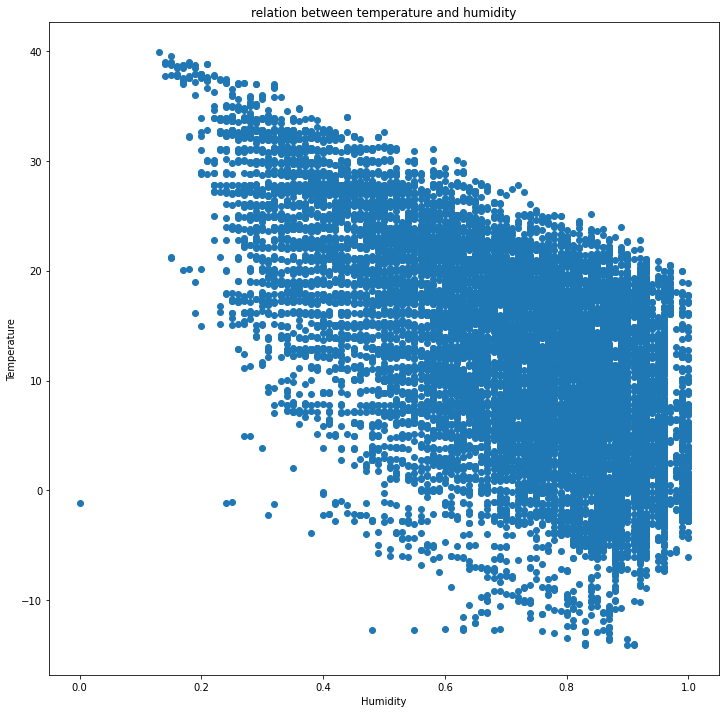

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(rel['Humidity'],rel['Temperature (C)'])
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title("relation between temperature and humidity")
plt.show()

In [ ]:
relation=we[['Humidity','Apparent Temperature (C)']]

In [ ]:
relation.head()

,Humidity,Apparent Temperature (C)
0,0.89,7.388889
1,0.86,7.227778
2,0.89,9.377778
3,0.83,5.944444
4,0.83,6.977778


Text(0, 0.5, 'temperture')

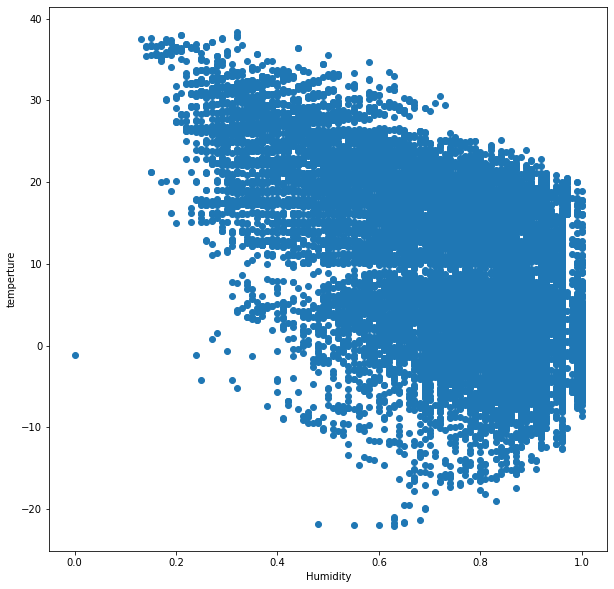

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(relation['Humidity'],relation['Apparent Temperature (C)'])
plt.xlabel('Humidity')
plt.ylabel('temperture')

In [ ]:
relation.isna()

,Humidity,Apparent Temperature (C)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24503,False,False
24504,False,False
24505,False,False
24506,False,False


In [ ]:
relation.isna().sum()

Humidity                    0
Apparent Temperature (C)    0
dtype: int64

In [ ]:
X=relation.iloc[:,:1]
Y=relation.iloc[:,-1]

In [ ]:
print(X)

       Humidity
0          0.89
1          0.86
2          0.89
3          0.83
4          0.83
...         ...
24503      0.78
24504      0.79
24505      0.72
24506      0.75
24507      0.75

[24508 rows x 1 columns]


In [ ]:
print(Y)

0        7.388889
1        7.227778
2        9.377778
3        5.944444
4        6.977778
           ...   
24503   -6.261111
24504   -6.088889
24505   -5.316667
24506   -5.961111
24507   -5.855556
Name: Apparent Temperature (C), Length: 24508, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,Y_train)

LinearRegression()

Text(0, 0.5, 'temperture')

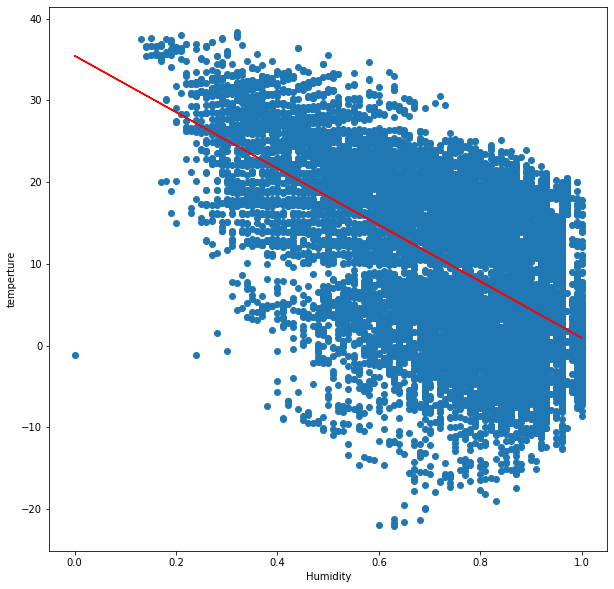

In [ ]:

plt.figure(figsize=(10,10))
plt.scatter(X_train,Y_train)
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Humidity')
plt.ylabel('temperture')

Text(0, 0.5, 'temperture')

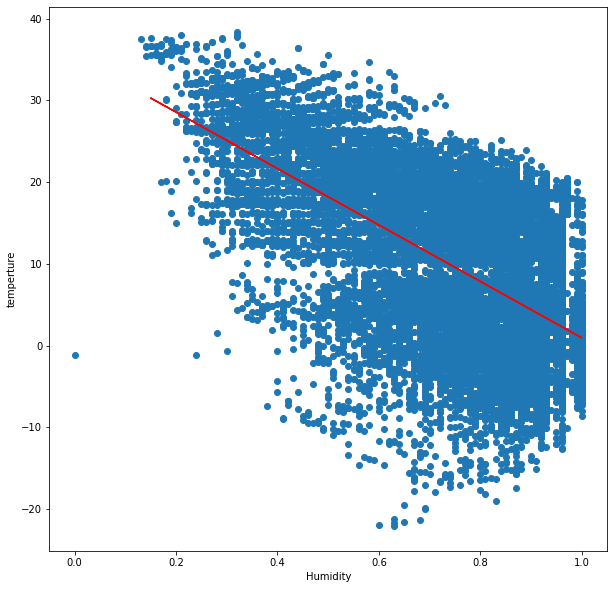

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_train,Y_train)
plt.plot(X_test,lr.predict(X_test),color='red')
plt.xlabel('Humidity')
plt.ylabel('temperture')

In [ ]:
score=metrics.r2_score(Y_train,lr.predict(X_train))

In [ ]:
print("R2 score is " ,score)

R2 score is  0.3828494361871507


In [ ]:
temperature_predict=lr.predict([[0.8]])
print(temperature_predict)

[7.84222074]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import seaborn as sns

In [ ]:
we.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             1
Loud Cover                  1
Pressure (millibars)        1
Daily Summary               1
dtype: int64

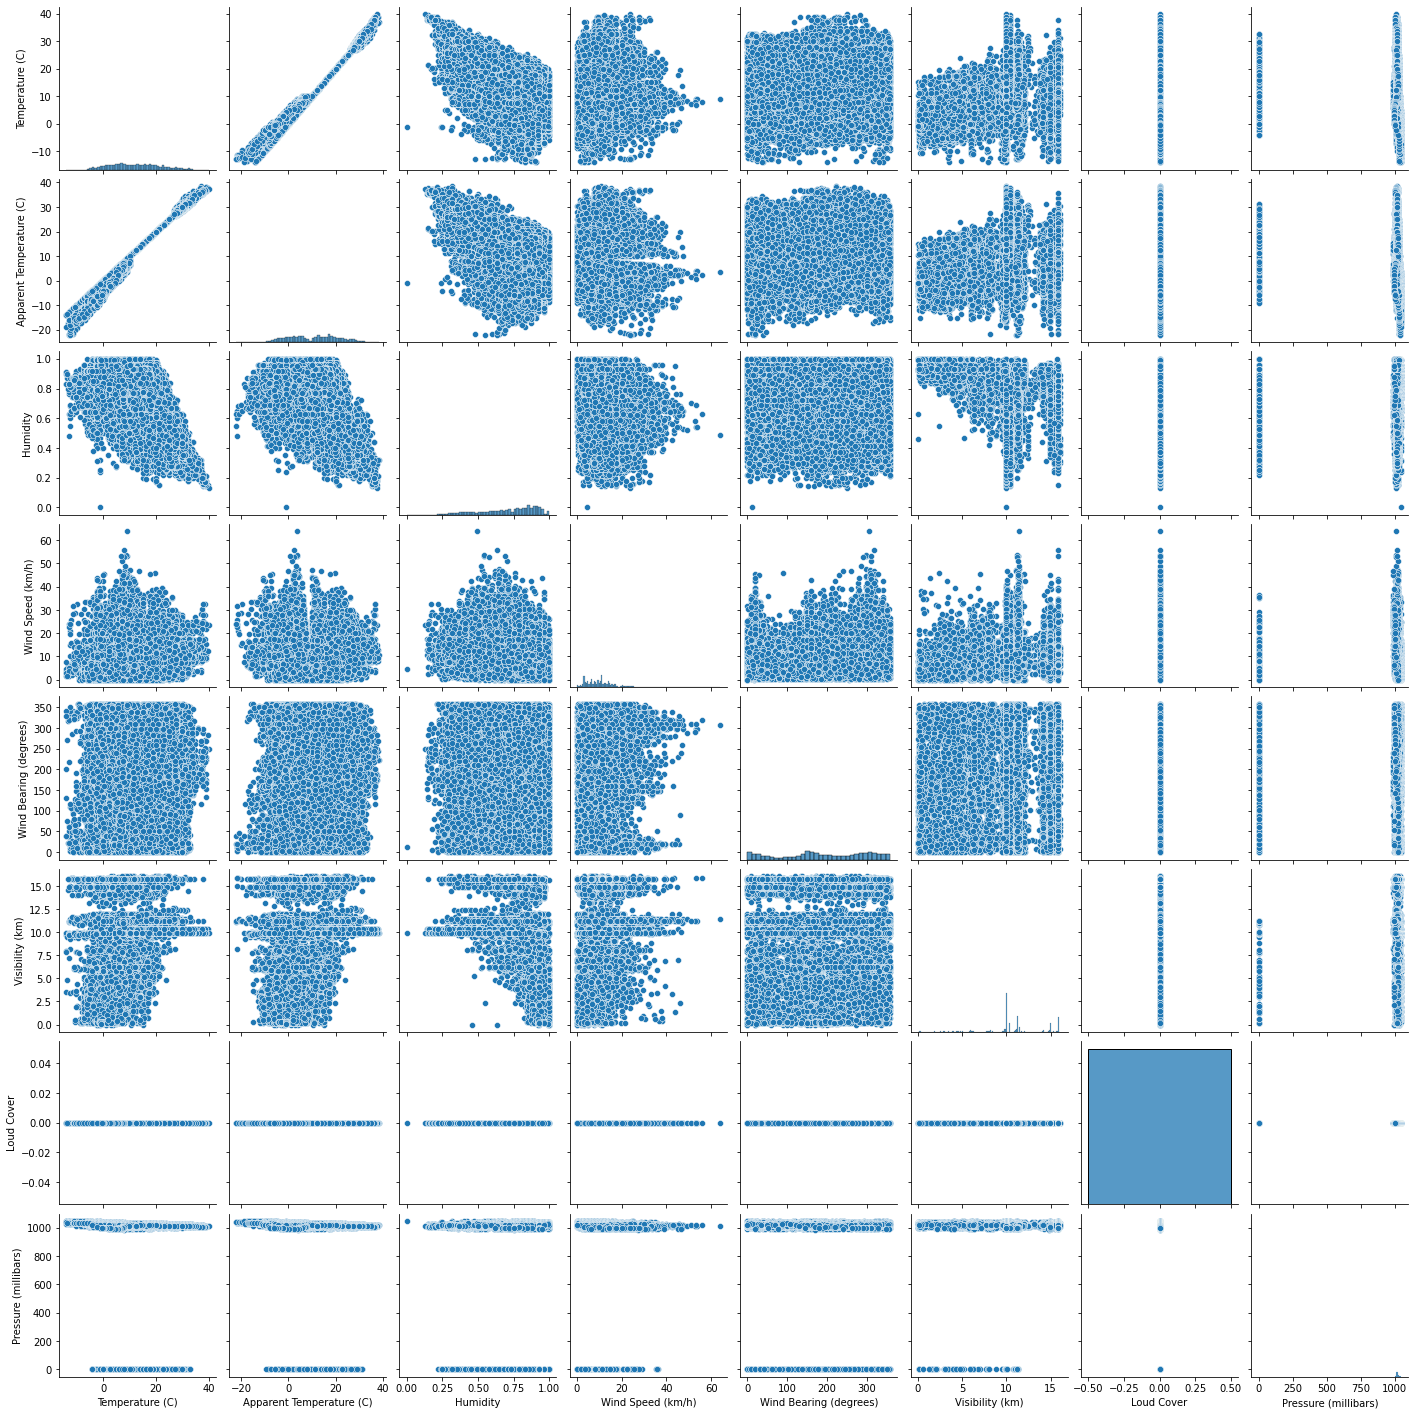

In [ ]:
sns.pairplot(we)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Precip Type', ylabel='count'>

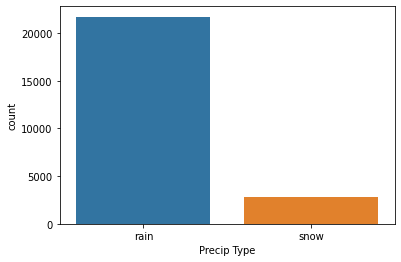

In [ ]:
sns.countplot(we['Precip Type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Summary', ylabel='count'>

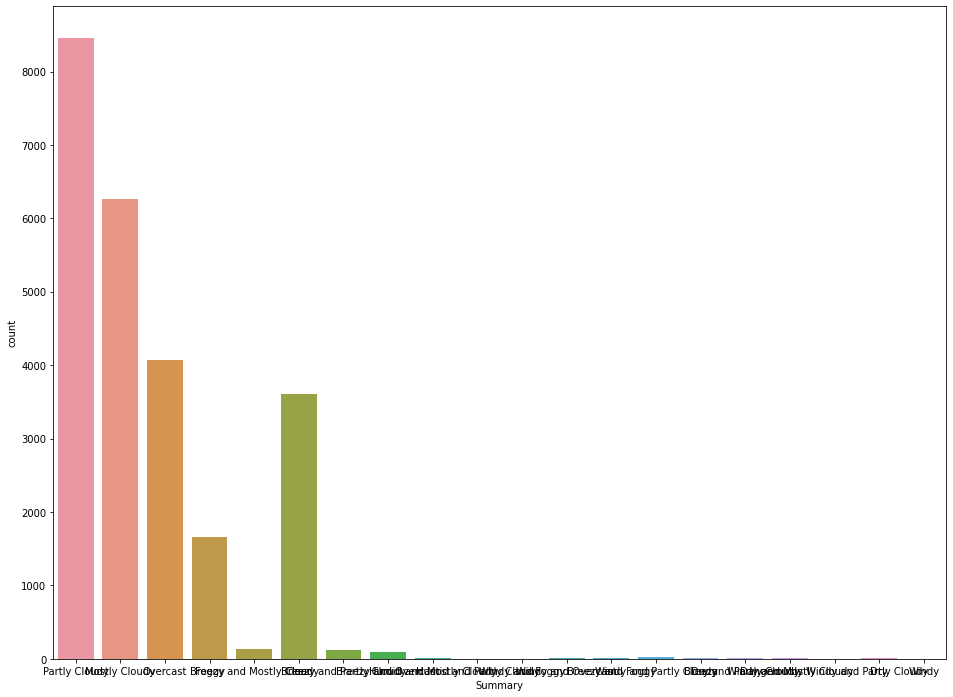

In [ ]:
plt.figure(figsize=(16,12))
sns.countplot(we['Summary'])

In [ ]:
we["Precip Type"]=we["Precip Type"].replace(np.nan,"rain")

In [ ]:
we["Precip Type"]=we["Precip Type"].replace("rain",1)
we["Precip Type"]=we["Precip Type"].replace("snow",0)

In [ ]:
we=we.drop(columns=['Summary'])

In [ ]:
we=we.drop(columns=['Daily Summary'])

In [ ]:
we

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,1,9.472222,7.388889,0.89,14.1197,251.0,15.826300,0.0,1015.130000
1,1,9.355556,7.227778,0.86,14.2646,259.0,15.826300,0.0,1015.630000
2,1,9.377778,9.377778,0.89,3.9284,204.0,14.956900,0.0,1015.940000
3,1,8.288889,5.944444,0.83,14.1036,269.0,15.826300,0.0,1016.410000
4,1,8.755556,6.977778,0.83,11.0446,259.0,15.826300,0.0,1016.510000
...,...,...,...,...,...,...,...,...,...
24503,0,-1.133333,-6.261111,0.78,17.5651,279.0,15.874600,0.0,998.550000
24504,0,-2.377778,-6.088889,0.79,9.8371,196.0,14.956900,0.0,1005.530000
24505,1,0.022222,-5.316667,0.72,20.8656,271.0,15.826300,0.0,999.610000
24506,0,-0.555556,-5.961111,0.75,20.3021,262.0,15.826300,0.0,999.730000


In [ ]:
we=we.drop(columns='Formatted Date')

In [ ]:
we['Loud Cover']=we['Loud Cover'].replace(np.nan,we['Loud Cover'].mean())

In [ ]:
we['Pressure (millibars)']=we['Pressure (millibars)'].replace(np.nan,we['Pressure (millibars)'].mean())

In [ ]:
we['Visibility (km)']=we['Visibility (km)'].replace(np.nan,we['Visibility (km)'].mean())

In [ ]:
a=we.drop(columns=['Apparent Temperature (C)'])
b=we["Apparent Temperature (C)"]

In [ ]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(a_train,b_train)

LinearRegression()

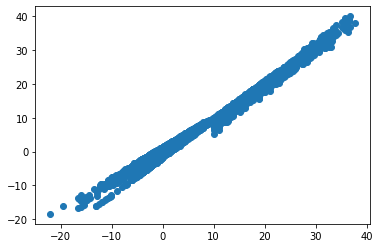

In [ ]:
plt.scatter(b_test,lr.predict(a_test))

In [ ]:
score=metrics.r2_score(b_test,lr.predict(a_test))

In [ ]:
print(score)

0.9901723712516113
